投票结果： Counter({np.int64(2): 90, np.int64(0): 68, np.int64(1): 42})


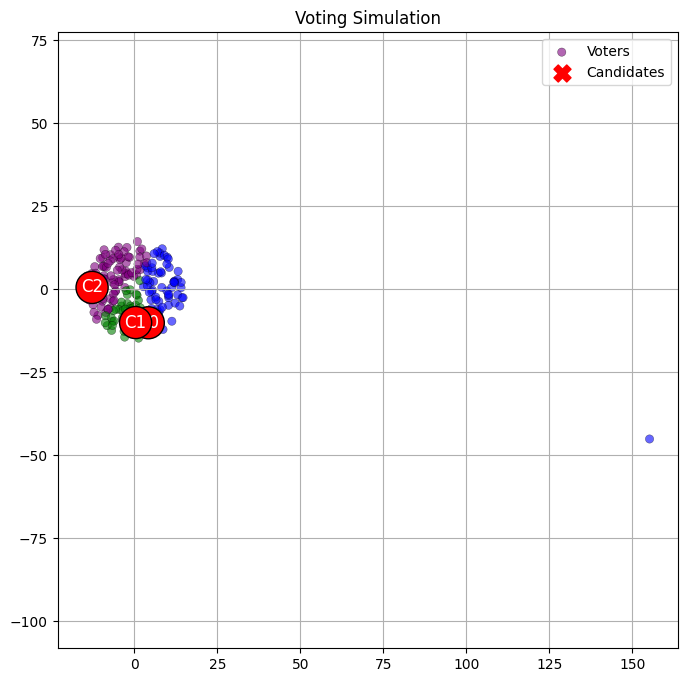

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

class VotingSimulation:
    def __init__(self,
                 num_voters=100,
                 num_candidates=3,
                 center=np.array([0, 0]),
                 spread_radius=10,
                 dimension=2):
        self.num_voters = num_voters
        self.num_candidates = num_candidates
        self.center = np.array(center)
        self.spread_radius = spread_radius
        self.dimension = dimension

        self.voters = self._generate_voters()
        self.candidates = self._generate_candidates()
        self.votes = None

    def _generate_voters(self):
        """在圆形范围内生成向量和为0的选民"""
        angles = np.random.uniform(0, 2 * np.pi, self.num_voters - 1)
        radii = np.sqrt(np.random.uniform(0, 1, self.num_voters - 1)) * self.spread_radius
        x = radii * np.cos(angles)
        y = radii * np.sin(angles)
        raw = np.column_stack([x, y])
        last = -np.sum(raw, axis=0)  # 保证质心为中心点
        voters = np.vstack([raw, last]) + self.center
        return voters

    def _generate_candidates(self):
        """候选人也在圆形区域生成"""
        angles = np.random.uniform(0, 2 * np.pi, self.num_candidates)
        radii = np.sqrt(np.random.uniform(0, 1, self.num_candidates)) * self.spread_radius
        x = radii * np.cos(angles)
        y = radii * np.sin(angles)
        return np.column_stack([x, y]) + self.center

    def vote(self):
        """每个选民投票给最近的候选人"""
        distances = np.linalg.norm(self.voters[:, np.newaxis, :] - self.candidates[np.newaxis, :, :], axis=2)
        self.votes = np.argmin(distances, axis=1)
        return self.votes

    def get_vote_count(self):
        if self.votes is None:
            self.vote()
        return Counter(self.votes)

    def plot(self):
        if self.dimension != 2:
            print("目前仅支持二维可视化")
            return
        if self.votes is None:
            self.vote()

        plt.figure(figsize=(8, 8))

        # 定义每个候选人的颜色
        cmap = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta']
        colors = [cmap[v % len(cmap)] for v in self.votes]

        # 绘制选民
        plt.scatter(self.voters[:, 0], self.voters[:, 1], c=colors, label='Voters', alpha=0.6, edgecolors='black', linewidths=0.3)

        # 绘制候选人
        plt.scatter(self.candidates[:, 0], self.candidates[:, 1], c='red', marker='X', s=150, label='Candidates')
        for idx, candidate in enumerate(self.candidates):
            plt.text(candidate[0], candidate[1], f'C{idx}', fontsize=12, ha='center', va='center',
                     color='white', bbox=dict(facecolor='red', edgecolor='black', boxstyle='circle,pad=0.3'))

        # 自动根据选民中心居中视图
        voter_center = np.mean(self.voters, axis=0)
        buffer = self.spread_radius * 1.2
        plt.xlim(voter_center[0] - buffer, voter_center[0] + buffer)
        plt.ylim(voter_center[1] - buffer, voter_center[1] + buffer)

        plt.title("Voting Simulation")
        plt.grid(True)
        plt.legend()
        plt.axis('equal')
        plt.show()

# 测试运行
sim = VotingSimulation(num_voters=200, num_candidates=3, spread_radius=15)
sim.vote()
print("投票结果：", sim.get_vote_count())
sim.plot()
